# 2019 Data Science Term Project

## Project title: Explore and Analyze Black Friday Data & Build a Recommendation Model

###### Team members: 
 * **Hyesu Lim** : Computer Science 2017320160 
 * **Jiwon Lee** : Compter Science 2017320214
 * **Chaeryeong Kim** : Computer Science 2017320233

###### Main Role: 
 * **Hyesu Lim** : modeling the data
 * **Jiwon Lee** : correlation analysis of the data
 * **Chaeryeong Kim** : exploratory data analysis
 * Cooperated together on the other parts.

###### Data Science Pipeline:
  Following these piplelines, we aim to try as many trials as possible to get some knowledge of the data.
  1. Ask an interesting question
  2. Get the data
  3. Explore the data
  4. Correlation analysis to data
  5. Data Preprocessing & Model the data
  6. Visualize the summary result and conclusion

## 1. Ask an interesting question
######  Using the shopping history, can we recommend the items to specific users?
* **Motivation** : <br>
  Today, we are living in the world of the **recommendation systems**. Whenever we go shopping online, the recommendation system of the site automatically recommend us several items using our recorded preferences, history of items we bought, and other information. Not only shopping mall, but also a lot of popular SNS such as instagram or facebook bring us the advertisement of the item that we once have searched online. <br><br>
  Based on this motivation, with the data set of shopping history of a shop, we came up with some interesting questions.<br><br>
  *"Can we build a recommendation system based on meomory we meant history?"*<br>
  *"What can we get from exploring and analyzing the data?"*<br>
  *"Can we adapt the result of the analysis to build models?"*

## 2. Get the data and define the problem

##### - data : Black Friday Data 
 * source: Kaggle 
 * url: https://www.kaggle.com/mehdidag/black-friday

##### - data description : 
  The dataset is a sample of the transactions made in a retail store on a black friday. With 550,000 observations, it contains different kinds of variables either numerical or categorical. It contains missing values. The data source is given in a csv format having 538K rows and 12 columns. The following describes each column with its name, description of each column, and given data type.

##### - data columns:
 * User_ID: User, numeric(6040 unique values) 
 * Product_ID: Id Pruduct, numeric(3623 unique values) 
 * Gender: gender of a customer, categorical(boolean) 
 * Age: age of a customer, categorical(range) 
 * Occupation: Id occupation of each customer, numeric 
 * City_Category: current staying in city, categorical 
 * Stay_In_Current_City_Years: years stayed in the city for each customer, categorical(range) 
 * Marital_Status: marital status, categorical 
 * Product_Category_1: product category 1, numeric 
 * Product_Category_2: product category 2, numeric 
 * Product_Category_3: product category 3, numeric 
 * Purchase: purchase amount in dollars, numeric 


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### - simple view of data

In [34]:
#load the dataset
data1 = pd.read_csv("BlackFriday.csv")

In [35]:
data1.shape

(537577, 12)

In [36]:
data1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [37]:
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


##### - definition of the problem
* Predict products to be purchased for customers.
* **Problem statement** : <br>
  Using the Black Friday Dataset with 538K instances and 12 attributes, we would like to expect some products to a specific customer for the coming Black Friday. We are planning to build user based collaborative filtering models for expecting product items. Furthermore, with the prediction result, we aim to recommend users items to place into their basket.
* **Expected Result** : <br>
  A model that searches for a expected list of items based on a specified user. 
    - input: user_id - customer ID 
    - output: list of items (product IDs), that the user would be most likely to buy

## 3. Explore the data

In order to understand our data, we are going to explore and analyze data by visualizing. The goal of this step is like below.
##### - goal of the step:
 * to figure out how data is distributed
 * understand the meaning of each attribute(column)
 * throwing & answering questions of the data
 * figuring out missing values
 * simple planning of imputing missing values
 * expect the exploration result to contribute to later steps


To get some insights from the data using the plots, here is **Exploratory Data Analysis** that we have done. 
Through this analysis, we tried to achieve some goals below.

1. Make decision about imputing NaN values. If needed, design an imputing plans.
2. Answering several questions we can think of intuitively from the data, 
        Imagine how we can utilize metadata to our recommendation system & roughly guess the result of correlation analysis.
        
        These are the questions we are going to answer here, to achieve the second goal.
    
        1. What all are the products, that have been purchased the most?
        2. Which product category has been sold the maximum?
        3. Men or Women, who are likely to spend more in Black Friday Sales?
        4. Married or Individuals, who spends more?
        5. Which age group has more interest in these type of sales?
        
We start data analysis by loading the data and importing a few packages we need. Then, by exploring the data focusing on the two goals we set, we try to achieve the goals and draw out some conclusions to connect the results to the coming steps.

### 3.1 Data analysis

In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sns
%matplotlib inline

In [4]:
#load the dataset
data = pd.read_csv("BlackFriday.csv")

In [41]:
data.shape

(537577, 12)

BlackFriday data set consists of 537577 rows(observations) with 12 columns(features)

In [42]:
#description of data set
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [43]:
#view first few records
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [44]:
#view last few records
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


We can see that our data contains information about users' shopping history. One row contains who bought which kind of a product with several features related to users and products and amount of dollars.

In [45]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Among total 12 columns, 
    
    - int64: User_ID, Occupation, Marital_Status, Product_Category_1, Purchase
    - float64: Product_Category2, Product_Category_3
    - object: Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years
        
  Here, we got some categorical(Nominal) columns that need encoding process later if we have to use those columns for modeling.

In [46]:
#insights on NaN values
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

We know that there exist missing values (null vlaues) in `Product_Category_2` and `Product_Category_3`.
So, we are going to investigate the proportion of missing values in the data set.

#### Distribution of purchase count of each user

In [95]:
#in ascending order of user id, how many time user shopped
a = np.array(data["User_ID"])
unique_elements, counts_elements = np.unique(a, return_counts=True)
pd.pivot_table(data, index=["User_ID", "Product_ID"], values=["Product_Category_1", "Product_Category_2", "Product_Category_3"]).head()

Product_Category_1  Product_Category_2  Product_Category_3
User_ID Product_ID                                                            
1000001 P00000142                    3                 4.0                 5.0
        P00004842                    3                 4.0                12.0
        P00025442                    1                 2.0                 9.0
        P00051442                    8                17.0                 NaN
        P00051842                    4                 8.0                 NaN

The table above shows the `Product_Category_1,2,3` according to the `User_D` and `Product_ID`. Through this, we noticed that the fact that the all 3 product categories matched does not necessarily mean that the two products have the same `Product_ID`. In other words, it indicates that they are different items. Also, we noticed that users bought no same items twice or more, which says users bought an unique item only once since original data information shows that it has 537577 rows and as we can see above, if we organized the data in the point of `User_ID` and `Product_ID`, we got same number of rows.

In [5]:
data2 = data.drop(['Gender', 'Age', 'Occupation', 'City_Category',
                  'Stay_In_Current_City_Years', 'Marital_Status',
                  'Product_Category_1', 'Product_Category_2',
                  'Product_Category_3', 'Purchase'], axis=1)
data2 = data2.groupby(['User_ID']).count()
user_cnt_info = pd.DataFrame({'User_ID':data2['Product_ID'].index, 'countProduct':data2['Product_ID'].values})

In [97]:
user_cnt_info.head()

,User_ID,countProduct
0,1000001,34
1,1000002,76
2,1000003,29
3,1000004,13
4,1000005,106


Here, we found that each user shopped about 91 items on average. This is very important since later when we build our models, we are going to split out data according to `User_ID` and we will delete the users who bought less than predefined frequency.

In [98]:
user_cnt_info_array = np.array(user_cnt_info['countProduct'])

stat = pd.Series(user_cnt_info_array)
stat.describe()

count    5891.000000
mean       91.253947
std       105.929800
min         5.000000
25%        25.000000
50%        53.000000
75%       114.000000
max      1025.000000
dtype: float64

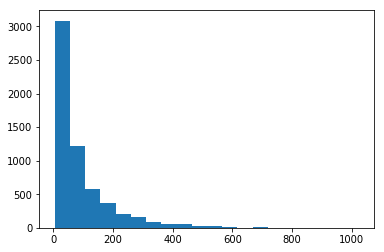

In [93]:
n, bins, patches = plt.hist(user_cnt_info_array, bins=20)
plt.show()

This shows the distiribution of purcahse count of each users. Since we are planning to use memory-based CF, we need enough data for each user. We visualized this to check whether this data is appropriate for memory-based CF. According to the result, we noticed that top 25% of users (1472 users) has bought more than 114 products and concluded that this data is usable for memory-based CF.

### Goal 1: Investigating missing values in the data and planning imputing method


In [100]:
#copy the original data frame so that changes made in copy will not modify the original version
data_copy = data.copy()
print ("Shape of Original data:{}".format(data.shape))
print ("Shape of Copy data_copy:{}".format(data_copy.shape))

Shape of Original data:(537577, 12)
Shape of Copy data_copy:(537577, 12)


Here, we are going to drop the NaN values in the copied one to check how much data loss we have.

In [101]:
data_copy.dropna(inplace=True)
print ("Shape of Original data:{}".format(data.shape))
print ("Shape of Copy data_copy:{}".format(data_copy.shape))

Shape of Original data:(537577, 12)
Shape of Copy data_copy:(164278, 12)


In [92]:
#(data.shape[0] - data_copy.shape[0])/data.shape[0]
print ("Propotion of missing values in data :{0:.3f}".format((data.shape[0] - data_copy.shape[0])/data.shape[0]))

Propotion of missing values in data :0.694


##### Removing all the NaN values results in losing about 70% of data in the data set. 
This results in biased model causing model to be underfit.
Therefore, we noticed that it might be better to take some available alternate approaches "imputing" with mean, mode, 0 or etc. To get ready for further analysis, we thought `Product_Category_2` and `Product_Category_3` columns are interlinked with values in `Product_Category_1`, which made us to think that imputing with mean or mode will not going to be a good strtegy. So we thought we'll use only `Product_Category_1` which is the upper most category of the product in the later step. But for now to visualize and answer the questions we brought, we will simply fill the NaN values with 0.

In [102]:
#fill na with zero - imputing w/ 0
data.fillna(0, inplace=True)
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Now that we can see that no NaN values exist in our dataset, which means we are ready for further analysis.

### Goal 2: Answer the questions and visualize

To answer to our 5 questions, we firstly need to create several functions for simplicty.

In [6]:
#create a function to plot this
def count_plot(dataframe, column_name, title =None, hue = None):
    
    '''
    Function to plot seaborn count plot
    Input: Dataframe name that has to be plotted, column_name that has to be plotted, title for the graph
    Output: Plot the data as a count plot
    '''
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)
    pass

In [97]:
#create an quick & simple bar plot based on pandos plot method
def simple_bar_plot(data, title = None):
   
    '''
    A simple bar plot based on pandas plot method
    Input: data to be plotted and title for the plot
    Output: the plotled graph
    '''
    data.plot("bar", title = title)
    pass

In [98]:
#create class handler to get the legend displayed in the plot
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        '''
        Function to display legend for a plot
        Input: legend, tuple string, placement of x and y descent, width and hight, font for the legend
        Output: retuns the text for legend        
        '''
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

#### (1) What all are the products, that have been purchased the most?

In [99]:
#top 10 poducts sold
data["Product_ID"].value_counts(sort=True)[:10]

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00145042    1384
P00059442    1384
Name: Product_ID, dtype: int64

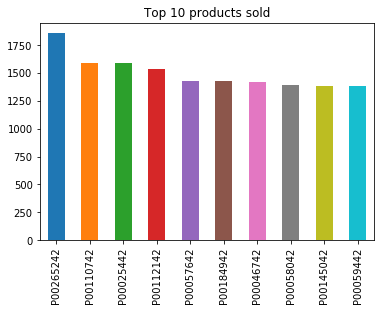

In [101]:
#plotting the top 10 products sold
simple_bar_plot(data["Product_ID"].value_counts(sort=True)[:10], title = "Top 10 products sold")

Here above, we can see that top 10 products are sold more than 1200 in quantity. Unfortunately, we do not have the products description in the data set to get more details of the product so let's see what all product cateogry that interested people.

#### (2) Which product category has been sold the maximum?

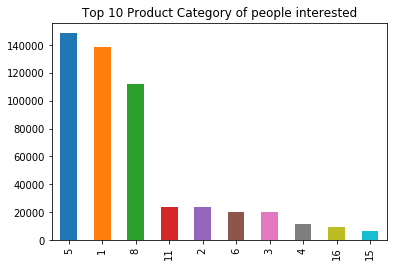

In [102]:
#plotting the product category
simple_bar_plot(data["Product_Category_1"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Category of people interested")

The product categories 5, 1, 8 are sold more than 100K whereas the product categories 11, 2, 6, 3 have sold upto 20K. We can see that there is some gap between the top 3 and the rest of the categories. Unfortunately again, we either have no descriptions about categories.

#### (3) Men or Women, who are likely to spend more in Black Friday Sales?

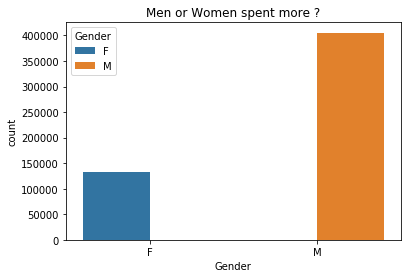

In [103]:
#check who purchase more
count_plot(data,"Gender","Men or Women spent more ?","Gender")

Against our guess, the plot shows that men spent a lot in the black friday sales. However, it might be in other way as women purchased a lot and made their spouse pay the bills which leads us try more to understand on marital status of the buyers.

#### (4) Married or Individuals, who spends more? 

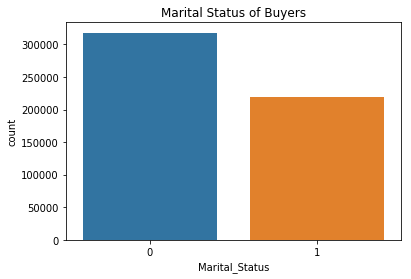

In [104]:
#check who purchses more
count_plot(data,"Marital_Status","Marital Status of Buyers")

The above plot is represented with value of 0 and 1 so, let's plot with the same with proper legend.

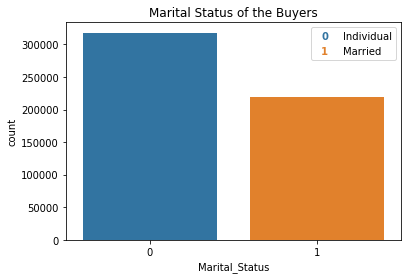

In [106]:
ax=sns.countplot(data.Marital_Status) 
#create the mapping text for the values
handltext = ["0", "1"]
labels = ["Individual", "Married"]
#get the X axis tick labels
t = ax.get_xticklabels()
#map the x values as key and values
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
plt.title("Marital Status of the Buyers")
plt.show()

#### (5) Which age group has more interest in these type of sales? 

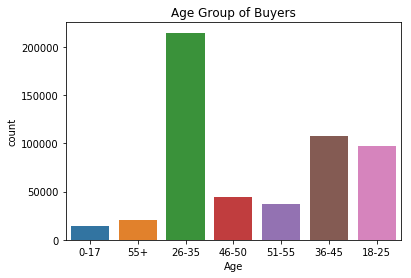

In [109]:
#sns.countplot(data['Age'])
count_plot(data,"Age","Age Group of Buyers")

The majority of the buyers are from the age group of 26-35. Further, we could additionally check among the age groups that gender was a majority by adding a hue as seen below. More males spent in the sale than females.

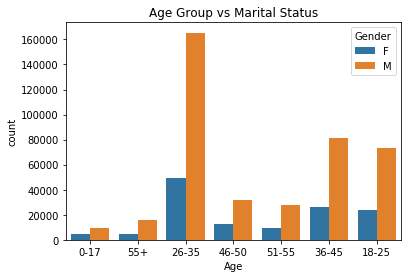

In [110]:
count_plot(data,"Age","Age Group vs Marital Status", "Gender")

One last thing, let's check Age group vs Marital status of indvidual along with their Gender. Like grouping the buyers in age group, also we need to see either it's male or female and interested see their marital status.

To achieve this we need to create a new combined feature, combining the gender and marital status. Later we can compare that with age group.

In [8]:
data['combined_G_M'] = data.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(data['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


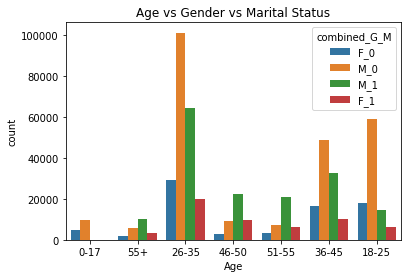

In [9]:
count_plot(data,"Age","Age vs Gender vs Marital Status", "combined_G_M")

As we see above, there're no bars for the married in the 0-17 range which makes sense. If we look at the 46 and above groups, females are very less. However, on the other hand, married males paying in range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

### End of the Exploring original dataset
So far, we explored how the data looks like, what it contains and discoverd some several important signals that might be used in the later steps. With the knowledge of the data like proportion of missing values in specific columns and insights we got from answering the questions, we hope all this efforts would contribute to our project.

## 4. Correlation analysis to data
Using clean data, we are going to analyze correlation between attributes. 
##### - goal of the step : 
  to find out important relationships between features.

 The goal of this step is to find out important relationships between features. We will follow the procedures below to find the correlation between the features.

&nbsp; &nbsp; **1. Convert categorical values into numerical values.**

&nbsp; &nbsp; **2.  Analyze correlation between 'Purchase' and other features.**

&nbsp; &nbsp; **3. Produce user data and analyze the correlation.**

&nbsp; &nbsp; **4. Analyze correlation between 'Product Category' and other features.**



<br>
 Before the start, we'll use the clean data that we got in the first step, **Exploratory Data Analysis**. At the first step, we found that there are lots of missing values in `Product_Category_2` and `Product_Category_3`. We thought that these columns are related to the values in `Product_Category_1`, so we'll use only `Product_Category_1` in correlation analysis. 

In [1]:
import os
import seaborn as sns
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BlackFriday.csv')
data_c = data

In [3]:
del_columns = ['Product_Category_2', 'Product_Category_3']
data_c.drop(del_columns, inplace=True, axis=1)
data_c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


 We deleted the column `Product_Category_2` and `Product_Category_3` like the table above. In the case of product category, we'll only use `Product_Category_1` in the latter steps. 

### 4.1. Convert Categorical values into numerical values

 To find the correlation between the features, each feature should be converted into numerical values. Let's look at the data types and unique values of each feature.

In [4]:
# data type of each feature
data_c.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

In [5]:
# number of unique values of each feature
data_c.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

<br>

`Gender` : There are two types of gender(female and male) so we can make this binary. 

`Age` : This column presents 7 age groups. Age should be treated as numerical, so we can convert the variables into 0 - 7.

`City_Category` : This column has 3 types of cities. It consists of A, B and C. So, we can convert the variables into 0 - 7.

`Stay_In_Current_City_Years` : The '+' symbol should be treated.

#### 4.1.1. Convert `Gender` into binary values

In [6]:
# Convert F -> 1, M -> 0 
data_c['Gender'] = (data_c['Gender'] == 'F').astype(int)
data_c.Gender.value_counts()

0    405380
1    132197
Name: Gender, dtype: int64

#### 4.1.2. Convert `Age` into numerical values

In [7]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data_c["Age"] = data_c["Age"].apply(lambda line: age_dict[line])
data_c.Age.value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

#### 4.1.3. Convert `City_Category` into numerical values

In [8]:
# There exists 'A' 'B' 'C' in City_Category
# Giving City_Category Numerical values
city_dict = {'A':0, 'B':1, 'C':2 }
data_c["City_Category"] = data_c["City_Category"].apply(lambda line: city_dict[line])
data_c.City_Category.value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

#### 4.1.4. Convert `Stay_In_Current_City` into numerical values

In [9]:
# Giving City_Category Numerical values
# Convert 4+ into 4
city_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4 }
data_c["Stay_In_Current_City_Years"] = data_c["Stay_In_Current_City_Years"].apply(lambda line: city_dict[line])
data_c.Stay_In_Current_City_Years.value_counts()

1    189192
2     99459
3     93312
4     82889
0     72725
Name: Stay_In_Current_City_Years, dtype: int64

In [10]:
data_c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370
1,1000001,P00248942,1,0,10,0,2,0,1,15200
2,1000001,P00087842,1,0,10,0,2,0,12,1422
3,1000001,P00085442,1,0,10,0,2,0,12,1057
4,1000002,P00285442,0,6,16,2,4,0,8,7969


 Therefore, we got the data of the numerical features through the process above. We'll use this converted data in the correlation analysis.

<br>
<br>
 Before we get into **Step 2**,  we'll visualize the **pearson** correlation between all numeric features of the data that we converted through the previous proceeses. 

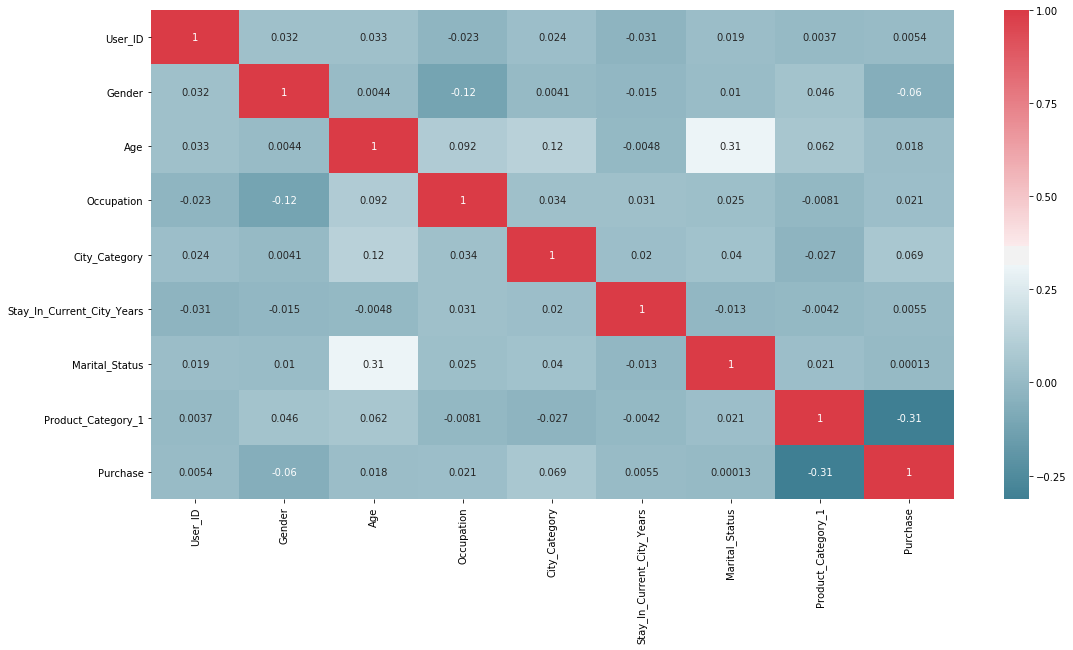

In [11]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = data_c.corr(method = 'pearson')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

<br>

### 4.2. Analyze Correlation between `Purchase` and other features

 At first, we are going to find the correlation between **`Purchase`** and other numerical features. We'll get this correlation using the **pearson** method and **spearman** method.

#### 4.2.1. Pearson Correlation between `Purchase` and other numerical features

In [34]:
#pearson correlation between Purchase and other features
numeric_features = data_c.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase                      1.000000
City_Category                 0.068507
Occupation                    0.021104
Age                           0.017717
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
Gender                       -0.060086
Product_Category_1           -0.314125
Name: Purchase, dtype: float64 



  The above table shows that `City_Category`, the **type of city** has the highest correlation value with the `Purchase` (the price of the product) among the other numerical features. But still, correlation value is low. For clear understanding of the relationship between the `City_Category` and `Purchase`, let's visualize `Purchase` and `City_Category`. 

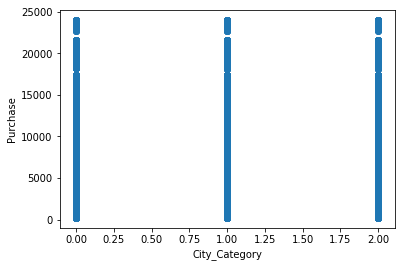

In [13]:
# scatter plot x-> City_Category, y -> Purchase
plt.scatter(data_c['City_Category'], data_c['Purchase'])
plt.xlabel('City_Category')
plt.ylabel('Purchase')
# Show plot
plt.show()

 As we can see in this scatter plot, the distribution of the `Purchase` with the `CIty_Category` is not clear. Therefore, it might be hard to say that `City_Category` is correlatted with the `Purchase`, the price of the product item that the user bought. We'll deal with this contents in detail in **3.1**. 

#### 4.2.2 Spearman Correlation between `Purchase` and other numerical features

 Through the previous step **2.1**, we found the pearson correlation between `Purchase` and other features. In this step, we'll get the spearman correlation. For the meaningful result, we are going to use the part of the numerical features. We'll select rank-ordered features.

In [14]:
#selected features to use in spearman correlation analysis
selected_features = {"Stay_In_Current_City_Years", "Age", "Purchase"}

We selected the features that have continuous values `Stay_In_Current_City_Years` and `Age` to use in Spearman correlation analysis. The features that have the categorical values semantically are excluded. The table below is the result of the Spearman correlation between `Purchase` and the selected features.

In [15]:
# spearman correlation value between Purchase and selected features
spear_data = data_c[selected_features]
corr = spear_data.corr(method = 'spearman')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n') 

Purchase                      1.000000
Age                           0.021708
Stay_In_Current_City_Years    0.006011
Name: Purchase, dtype: float64 



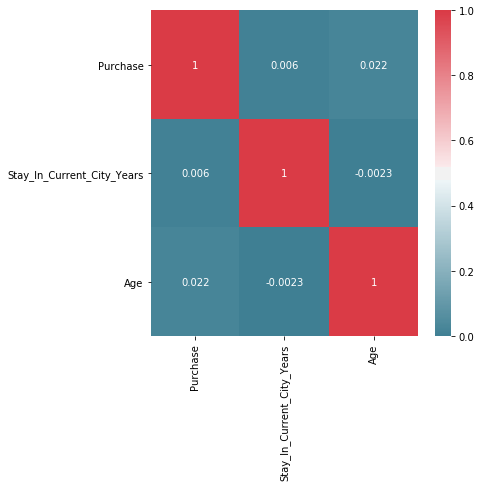

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
corrmat = data_c[selected_features].corr(method = 'spearman')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

We can see that `Age` has the highest spearman correlation with `Purchase` among the selected features. The heatmap above is the visualization of the spearman correlation between the selected features.

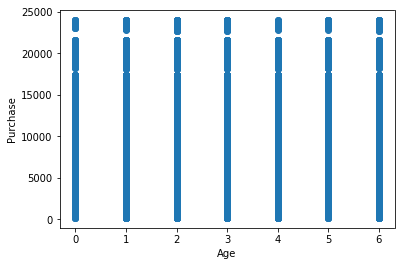

In [33]:
# scatter plot x->Age, y->Purchase
plt.scatter(data_c['Age'], data_c['Purchase'])
plt.xlabel('Age')
plt.ylabel('Purchase')
# Show plot
plt.show()

 As we can see in this scatter plot, it is hard to say that `Age` is correlated with the price of the product, even though `Age` has the highest sperman correlation value with `Purchase` among the features. 

<br>

### 4.3.  Produce user data and analyze the correlation.

 We can create the **`user_data`** using the original features and some additional features. We'll calculate the amount of purchase of each user and the number of products that each user bought.

In [35]:
#group by user id and create count column. It counts the product numbers that each user bought.
temp = data_c.groupby(['User_ID']).count()

#get the sum of Purchase of each user.
temp['sumPurchase'] = data_c.groupby(['User_ID'])['Purchase'].sum()
df2 = pd.DataFrame({'User_ID':temp['Product_ID'].index, 'countProduct':temp['Product_ID'].values, 'sumPurchase':temp['sumPurchase']})

#create user_data
user_data = data_c.join(df2.set_index('User_ID'), on='User_ID').sort_values(['User_ID'])

#drop the rows for the duplicate user_id. 
user_data = user_data.drop_duplicates(["User_ID"], keep="first")
user_data = user_data.reset_index(drop = True)
user_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,countProduct,sumPurchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370,34,333481
1,1000002,P00289342,0,6,16,2,4,0,5,5260,76,810353
2,1000003,P00117042,0,2,15,0,3,0,1,3938,29,341635
3,1000004,P00329542,0,4,7,1,2,1,1,3849,13,205987
4,1000005,P00147942,0,2,20,0,1,1,1,15466,106,821001


 <br>
 
 We calculated the total amount of purchase of each user as `sumPurchase` and the number of products that each user bought as `countProduct` to create the user's data. We thought that information about the product is unneccessary in the `user_data`. Thus, we'll delete the columns of `Product_ID` and `Product_Category_1` to create the users' data.  

In [18]:
del_columns = ['Product_ID', 'Product_Category_1']
user_data.drop(del_columns, axis=1, inplace = True)

In [19]:
user_data.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase',
       'countProduct', 'sumPurchase'],
      dtype='object')

<br>

With this `user_data`, we'll find the correlation between the features.

#### 4.3.1. Pearson correlation between the features of `user_data`

 Let's see the correlation between the `sumPurchase` and other numerical eatures of `user_data`. 

In [36]:
numeric_features = user_data.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['sumPurchase'].sort_values(ascending=False)[:10],'\n')

sumPurchase                   1.000000
countProduct                  0.978977
Stay_In_Current_City_Years    0.003296
Occupation                    0.000419
Product_Category_1           -0.005089
User_ID                      -0.014669
Marital_Status               -0.020592
Purchase                     -0.033442
Age                          -0.068740
Gender                       -0.102781
Name: sumPurchase, dtype: float64 



 `countProduct` has extremly high correlation value with `sumPurchase`. So, we thought that we do not have to calculate the correlation between `countProduct` and other numeric features of `user_data`. We guessed that the result of the correlation between `countProduct` and other features would be similar to the result of the correlation between `sumPurchase` and other features as we got previously. 

 In contrast,  `City_Category` has the lowest correlation value with `sumPurchase`. But it does not imply that `City_Category` is anti-correlated with `sumPurchase`. This is because `City_Category` is encoded as 0, 1 and 2, and there is no metadata of the `City_Category`. For more details, let's visualize the `City_Category` values with `sumPurchase` and `countProduct`.

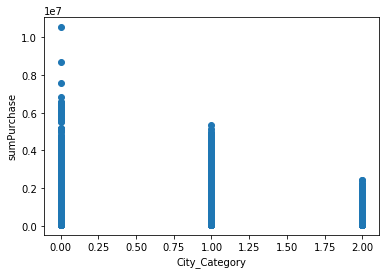

In [21]:
# Change the line plot below to a scatter plot
plt.scatter(user_data['City_Category'],user_data['sumPurchase'])
plt.xlabel('City_Category')
plt.ylabel('sumPurchase')
# Show plot
plt.show()

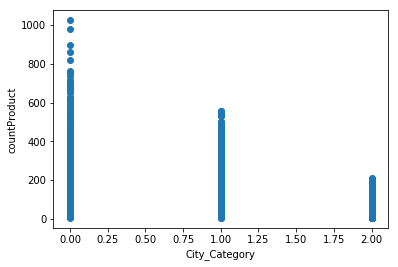

In [22]:
# Change the line plot below to a scatter plot
plt.scatter(user_data['City_Category'],user_data['countProduct'])
plt.xlabel('City_Category')
plt.ylabel('countProduct')
# Show plot
plt.show()

 First scatter plot shows the distribution of `sumPurchase` with the `City_Category`. Similarly, second scatter plot shows the distribution of `countProduct` with the `City_Category`. These two scatter plots show that people who live in **City_Category 1** tend to buy more products and spend more money than **City_Category 2** and **City_Category 3**. Therefore, as the encoded number of `City_Category` increases, people tend to buy less items and spend less money to the products. This is why the correlation value between `City_Category` and `sumPurchase` is negative. This negative value does not imply that these two features are anti-correlated. Rather, we can say that this `City_Category` has a meaningful relationship between the user's comsumption pattern. Even though we do not have the metadata for the `City_Category`, we can assume that **City_Category 1** is relatively richer than other cities like **City_Category 2 and 3.** 
 

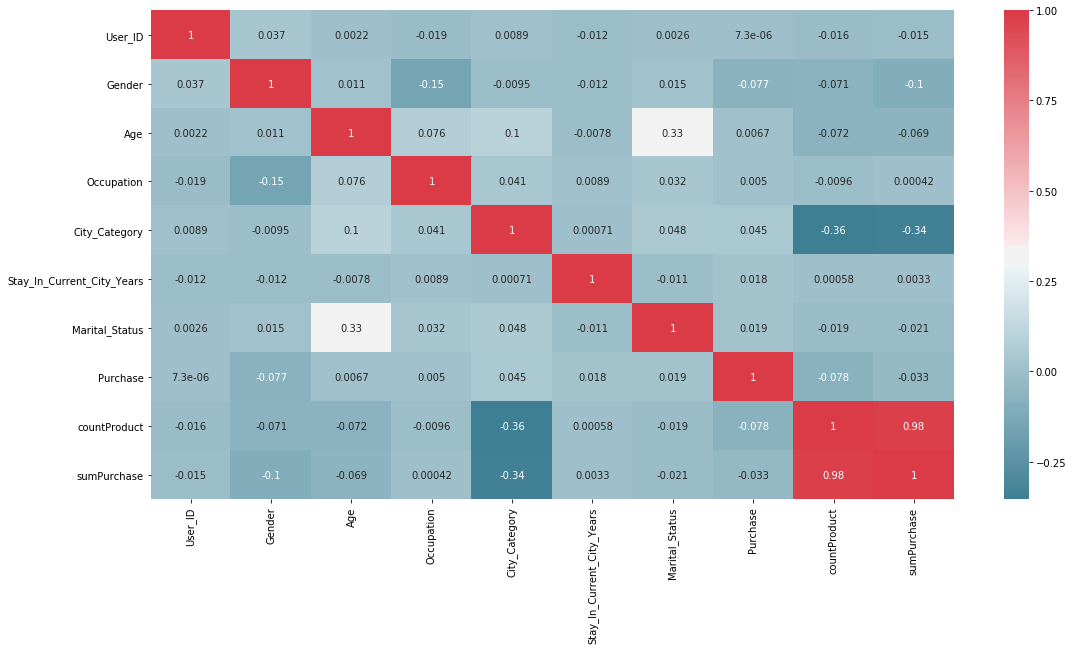

In [23]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = user_data.corr(method = 'pearson')
sns.heatmap(corr, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

 The heatmap shows the correlation between the features of `user_data`. As we assumed, we can find that the result of correlation between `countProduct` and other features is similar with the result of correlation between `sumPurchase` and other features. 
 <br>
 
 Based on the heatmap and correlation value of `user_data` above, we concluded that `City_Category` can be the feature of the users, which is highly correlated with the number of product items that the user bought and the total amount of purchase that the user spent. 

<br>

#### 4.3.2. Spearman correlation between the features of `user_data`

In this step, we'll get the spearman correlation. As we used only three features in **2.2**, we are going to use the part among the numerical features in this step, too.

We selected the features of `user_data` by applying the same criteria. 

In [42]:
selected_features = {"Age","Stay_In_Current_City_Years","sumPurchase", "countProduct"}

In [43]:
spear_data = user_data[selected_features]
corr = spear_data.corr(method = 'spearman')
print (corr['sumPurchase'].sort_values(ascending=False)[:10],'\n') 

sumPurchase                   1.000000
countProduct                  0.980553
Stay_In_Current_City_Years    0.007762
Age                          -0.063903
Name: sumPurchase, dtype: float64 



 `countProduct` has extremly high correlation value with `sumPurchase`, so we are not going to find the correlation value between `countProduct` and other selected features. Except for `countProduct`, se can see that `Age` has the highest absolute value of spearman correlation with `sumPurchase` among the selected features. To understand this relationship clearly, let's visualize the value of `sumPurchase` with `Age`.

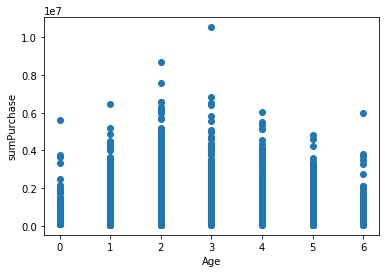

In [45]:
# Change the line plot below to a scatter plot
plt.scatter(user_data['Age'],user_data['sumPurchase'])
plt.xlabel('Age')
plt.ylabel('sumPurchase')
# Show plot
plt.show()

 According to the distribution of `sumPurchase` with `Age`, correlation value between `Age` and `sumPurchase` is not that significant. The result will be similar if we get the distribution of `countProduct` with `Age`. So, we can just conclude that age group of 2 (26-35) and 3 (36 -45) spend more money in Black Friday than other age groups. 

<br>

 Below is the heatmap of spearman correlation value between the `selected_features`.

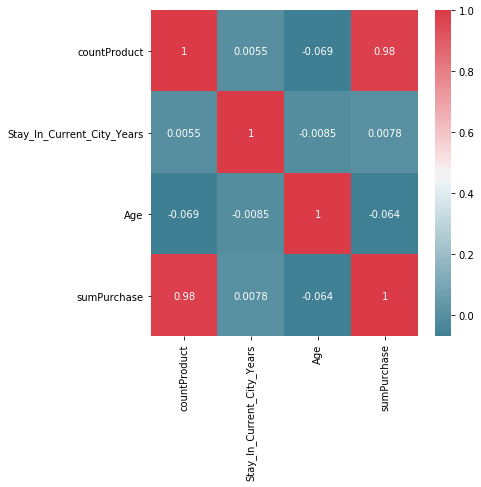

In [44]:
f, ax = plt.subplots(figsize=(6, 6))
corrmat = user_data[selected_features].corr(method = 'spearman')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

<br>
<br>

### 4.4. Analyze correlation between `Product Category` and other features.

 Through the step **3**, we analyzed the correlation between the features explaining the users. In this step, we want to find the correlation using `Product_Category` in which the items that the user bought belongs. To analyze the correlation between `Product_Category_1` and other features of the data, we're going to use both of the features of products and the features of users. 

  Also, we'll only find the pearson correlation between the features. We thought that spearman rank correlation analysis is not that meaningful because the variables of target feature `Product_Category_1` are not rank-ordered. `Product_Category_1` is just categorical data encoded as integers. 

<br>

#### Pearson correlation between `Product_Category_1` and other features

In [54]:
# spearman correlation value between Purchase and selected features
corr = data_c.corr(method = 'pearson')
print (corr['Product_Category_1'].sort_values(ascending=False)[:10],'\n') 

Product_Category_1            1.000000
Age                           0.061951
Gender                        0.045661
Marital_Status                0.020546
User_ID                       0.003687
Stay_In_Current_City_Years   -0.004182
Occupation                   -0.008114
City_Category                -0.027444
Purchase                     -0.314125
Name: Product_Category_1, dtype: float64 



The values above are the pearson correlation values between `Product_Category_1` and other features. When we convert the correlation values to absolute values, `Purchase` has the largest value among the features. In the case of the features related to users, `Age` has the largest absolute value of correlation with `Product_Category_1`. Therefore, we are going to look at the relationship betwen `Age` and `Product_Category_1` closely. 

##### Frequency of `Product_Category_1` group by each Age group

In [55]:
# freqeuncy of product_category_1 group by each age group
age_category = data_c.groupby(["Age", "Product_Category_1"]).size()
age_category

Age  Product_Category_1
0    1                      3524
     2                       789
     3                      1180
     4                       744
     5                      4280
     6                       392
     7                        51
     8                      2213
     9                        16
     10                      108
     11                      728
     12                      120
     13                      108
     14                       37
     15                      158
     16                      226
     17                        6
     18                       27
1    1                     26627
     2                      4348
     3                      4633
     4                      2436
     5                     28157
     6                      3711
     7                       474
     8                     17665
     9                        61
     10                      596
     11                     4549
     12            

The data above shows the freqeuncy of `Product_Category_1` in each age group. We found that the most frequent `Product_Category_1` varies according to the age group. Also, **Top 2 or 3 frequency** in each age group has significant difference from other values of frequency in the same age group. Here, **Top 2 or 3 freqeuncy** are the 2 or 3 frequency values that have largest value among the frequency values in the same age group. Based on this idea, we can use `Age` to recommend some products to each user. To be more specific, according to the analysis, there are specific **product categories** that each age group tends to buy and it made us think that the categories of the product reflect the users' preferences. Therefore, we assumed that if we recommend the products to users using their `Age` information, we would get a better performance in recommendation. 

###### 결론 필요

## 5. Data Preprocessing & Model the data

##### - goal of the step:
 * clean the data by handling missing values
 * build baseline model to compare with
 * build recommendation system using item based 

##### - rough outline of building model:
 * 5.1 import modules & packages
 * 5.2 load data and data preparation
 * 5.3 baseline model - popularity based
 * 5.4 collaborative filtering model - user based
 * 5.5 collaborative filtering model - user based with metadata : age
 * 5.6 model selection
 * 5.7 final output


### 5.1 Import Modules & Packages

In [4]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

### 5.2 Load Data and Data Preparation

We used the data of users who have bought more than 300 products. We used memory based CF, which needs enough history data for each user in order to recommend reasonably.

The criteria '300' is defined considering the number of resulting users. In order to reduce time required for computing the similarity between users, we decied to use '300' as our predefined frequency.

In [5]:
# load the data
path = 'BlackFriday.csv'
data = pd.read_csv(path)

# drop unnecessary columns to build matrices
data = data.drop(['Gender', 'Occupation', 'City_Category',
                  'Stay_In_Current_City_Years', 'Marital_Status',
                  'Product_Category_1', 'Product_Category_2',
                  'Product_Category_3', 'Purchase'], axis=1)

# count number of items purchased for each user & prepare for data selection
data2 = data.groupby(['User_ID']).count()
df = pd.DataFrame({'User_ID':data2['Product_ID'].index, 'countProduct':data2['Product_ID'].values})
data = data.join(df.set_index('User_ID'), on='User_ID').sort_values(['User_ID'])

# drop data whose countProduct is less than 300
data = data[data.countProduct >= 300]
data = data.reset_index(drop = True)

# data about users (312 users)
users = pd.DataFrame(data.User_ID.unique())
users.columns = ['User_ID']
users_length = len(users)

# data about products
products = pd.DataFrame(data.Product_ID.unique())
products.columns = ['Product_ID']
products_length = len(products)

# to mark the item purchased by the user
data['purchased'] = 1

# build a matrix with entry 1 if the user purchased the item or 0 if not
df_matrix = pd.pivot_table(data, values='purchased', index='User_ID', columns='Product_ID', fill_value=0)

# df has user and countProduct whose countProduct >= 300
user_cnt_info = pd.DataFrame({'User_ID':data['User_ID'], 'countProduct':data['countProduct']})
user_cnt_info = user_cnt_info.groupby(['User_ID', 'countProduct']).count().reset_index()

In [ ]:
# Giving Age Numerical values
# this cell is for collaborative filtering with age metatdata
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])
data.Age.value_counts()

In [ ]:
data_user_info = pd.DataFrame(data.User_ID.unique())
data_user_info.columns = ['User_ID']
data_user_age = data.drop(['Product_ID', 'countProduct', 'purchased'], axis = 1).drop_duplicates().set_index('User_ID')
data_user_age_dict = data_user_age['Age'].to_dict()

###### - Data split

We divied data into three parts : train, val, test data.

From 300 or more products per user, we randomly chose 10 products and store the `User_ID`, `Product_ID` information to validation data set, and chose another 10 products and store them into test data set. The remaining tuples are sotred as train dataset.

From train dataset, we recommend some products to each users and check if the model is working well using validation dataset.

In [ ]:
'''This cell is to split train, val, test data.'''

'''test = pd.DataFrame()
val = pd.DataFrame()
train = pd.DataFrame()

i = 0
j = 0

while i < len(data):
    cnt = data.loc[i].countProduct
    tmp = data[i: i+cnt]
    tmp = shuffle(tmp).reset_index()
    test = test.append(tmp[0:10])
    val = val.append(tmp[10:20])
    train = train.append(tmp[20:])
    j = j + 1
    i = i + cnt
    
train.to_csv("train_data.csv", mode='w')
val.to_csv("val_data.csv", mode='w')
test.to_csv("test_data.csv", mode='w')'''

In [6]:
'''This cell is to load saved train, val, test data.'''

train = pd.read_csv('train_data.csv')
val = pd.read_csv('val_data.csv')
test = pd.read_csv('test_data.csv')

train = train.drop(['Unnamed: 0', 'index'], axis=1)
val = val.drop(['Unnamed: 0', 'index'], axis=1)
test =test.drop(['Unnamed: 0', 'index'], axis=1)

train = pd.merge(train, data_user_age)
val = pd.merge(val, data_user_age)
test = pd.merge(test, data_user_age)

### 5.3 Baseline model - Popularity model

To tell whether our recommendation system is working well on data or not, we should have a baseline model to compare with. 

* Here, we adopted a popularity model that recommends top-5 most purchased product to users.

- Our plan for building a popularity baseline model is like this.
    * load the train & validation data and preprocess the data
    * build a train matrix with top-5 Product_ID and User_ID.
    * build a matrix with the same matrix frame with the step 1's but with all entries 1.
    * use similarity between 2 vectors of 5-dimensionality below
        - one with the recommendation result matrix,which is step 3 matrix - step 2 matrix
            * the result matrix would have entry with 1 only when the user didn't buy the product in train data but now they got recommended.
        - the other with the validation martix with entry only 1 when user bought the product in validation set
            * this would act as like a answer.
         - cf. we exclude and keep our test data unexposed just in case!

### 5.3.1. Load the train and validation data
- These pre-splitted train and validation data is exactly the same with the data set we used to build our own recommendation model.
    * We split train and validation of a user who bought more than 300 items.

In [21]:
# load the train data
train = pd.read_csv("train_data.csv")
# load the validation data
val = pd.read_csv("val_data.csv")

Since we only need User_ID,Product_ID, and purchased to build a baseline model, we'll drop all other columns here.

In [22]:
#drop columns of a train data
train = train.drop(['Unnamed: 0', 'index', 'countProduct'], axis=1)
#drop columns of a validation data
val = val.drop(['Unnamed: 0', 'index', 'countProduct'], axis=1)

In the introduction of building this baseline model, we planned to recommend the top 5 most frequently pruchased items to all users. This indicates that we don't need any rows with the `Product_ID` that is not in the list of top 5 `Product_ID`. For this deletion step, firstly, we need to know the which items are top 5 things.

### 5.3.2. Top-5 most frequently-purchased items & preprocessing
Here, we are going to discover 5 items that were most frequently purchased. To do this, we refer to the code we wrote in the very first of our data pipeline step, exploratory data analysis. Only difference is here we use top-5 but before, we had top-10.

In [23]:
# load an original data set
origin = pd.read_csv("BlackFriday.csv")
#top-5 poducts sold
origin["Product_ID"].value_counts(sort=True)[:5]

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
Name: Product_ID, dtype: int64

Those 5 `Product_ID`s are from the very original data set.
Now, it is time to delete all the rows with non-top-5 items!

In [24]:
new_train_1 = train[(train.Product_ID == 'P00265242')]
new_train_2 = train[(train.Product_ID == 'P00110742')]
new_train_3 = train[(train.Product_ID == 'P00025442')]
new_train_4 = train[(train.Product_ID == 'P00112142')]
new_train_5 = train[(train.Product_ID == 'P00057642')]
new_train = pd.concat([new_train_1, new_train_2, new_train_3, new_train_4, new_train_5])

new_val_1 = val[(val.Product_ID == 'P00265242')]
new_val_2 = val[(val.Product_ID == 'P00110742')]
new_val_3 = val[(val.Product_ID == 'P00025442')]
new_val_4 = val[(val.Product_ID == 'P00112142')]
new_val_5 = val[(val.Product_ID == 'P00057642')]
new_val = pd.concat([new_val_1, new_val_2, new_val_3, new_val_4, new_val_5])

Now, we got a same dataframe of `User_ID` and top-5 items for the train and validation data.

### 5.3.3. Build a Matrix
Here, we are going to transfrom the dataframe above into the matrix of `User_ID` and 5 `Product_ID` with the entry 0 or 1. 0 means the user didn't purchased the item or get the recommendation. On the other hand, 1 means the user bought the item or get the recommendation.
- Matrices we need & meaning
    * **train matrix** : shows the purchased history of users for the 5 items.
    * **recommendation matrix** : (matrix with all 1) - (train matrix) = recommending top 5 items to all users in train matrix
           1 for the recommend the item, 0 for no recommendation for the item since the user already bought it.
    * **validation matrix** : kind of an answer matrix.
    
    
 - compute cosine similarity of each user vector of recommendation matrix & validation matrix if the user exists both in two matrices.
 - that would act as an accuracy of our baseline model!

In [25]:
#building a train matrix
new_train_matrix = pd.pivot_table(new_train, values='purchased', index='User_ID', columns='Product_ID', fill_value=0)
#budling a validation matrix
new_val_matrix = pd.pivot_table(new_val, values='purchased', index='User_ID', columns='Product_ID', fill_value=0)
#building a matrix with all entries 1
new_recom_matrix = pd.pivot_table(new_train, index='User_ID', columns='Product_ID', fill_value=1)

#gain a recommendation matrix
new_recom_matrix = new_recom_matrix - new_train_matrix

Here, we got a recommendation matrix! 
* entry of 1 : recommend the item to the user since user didn't purchase it in the train matrix.
* entry of 0 : do not recommend the item to the user since user already bought it in the train matrix.
- So, to sum up, we only recommend the item to the user in the case the user didn't bought the item before(train set).

### 5.3.4. Implement a Consine Similarity Function & Compute Similarity

In [26]:
# defined a consine similarity function

def cos_sim(A, B):
    if(norm(A)==0 or norm(B)==0):
        return 0
    else:
        return dot(A, B)/(norm(A)*norm(B))  

In [27]:
#keep the User_ID of train matrix & top-5 items' Product_ID as a dataframe
users = pd.DataFrame(new_train.User_ID.unique())
users.columns = ['User_ID']
users_length = len(users)

top5products = pd.DataFrame(new_val.Product_ID.unique())
top5products.columns = ['Product_ID']
top5products_length = len(top5products)

#keep the User_ID of validation matrix
val_user_info = pd.DataFrame(new_val.User_ID)
val_user_info.columns = ['User_ID']

val_users_length = len(val_user_info)
new_similarity_matrix = np.zeros(shape=(val_users_length, 1))

In [28]:
#compute a similarity between user vectors of 5 dimesionality for the user who exist both in recommendation & validation matrix
for i, user1 in enumerate(val_user_info['User_ID']):
    for user2 in new_recom_matrix.index:
        if(user1 == user2):
            user_recom = np.array(new_recom_matrix.loc[user1])
            user_val = np.array(new_val_matrix.loc[user2])
            
            new_similarity_matrix[i] = cos_sim(user_recom, user_val)

In [29]:
pd.DataFrame(new_similarity_matrix).describe()

,0
count,23.000000
mean,0.566286
std,0.168464
min,0.000000
25%,0.500000
50%,0.577350
75%,0.577350
max,1.000000


### 5.3.5 Evaluate the Baseline

We are going to evaluate the baseline model with precision, recall, accuracy, and f_score.

In [34]:
precision = np.zeros(shape=(val_users_length, 1))
recall = np.zeros(shape=(val_users_length, 1))
accuracy = np.zeros(shape=(val_users_length, 1))
f_score = np.zeros(shape=(val_users_length, 1))

for i, user1 in enumerate(val_user_info['User_ID']):
    for user2 in new_recom_matrix.index:
        if(user1 == user2):
            user_recom = np.array(new_recom_matrix.loc[user1])
            user_val = np.array(new_val_matrix.loc[user2])
            
            conf = confusion_matrix(user_val, user_recom)
            TP = conf[0][0]
            FP = conf[0][1]
            FN = conf[1][0]
            TN = conf[1][1]
            
            precision[i] = TP/(TP+FP)
            accuracy[i] = (TP+TN)/(TP+TN+FP+FN)
            recall[i] = TP/(TP+FN)
            f_score[i] = 2*(precision[i]*recall[i])/(precision[i]+recall[i]) 

In [35]:
avg_precision = precision.mean()
avg_recall = recall.mean()
avg_accuracy = accuracy.mean()
avg_f_score = f_score.mean()

print("accuracy  : ", avg_accuracy)
print("recall    : ", avg_recall)
print("precision : ", avg_precision)
print("f_score   : ", avg_f_score)

accuracy  :  0.5565217391304348
recall    :  0.9565217391304348
precision :  0.45652173913043476
f_score   :  0.5925465838509316


- This would act like a baseline model's accuracy to compare with the accuracy of our new recommendation model.
- Here, we can see the similarity 1 the highest value obtainable, min  0.5.
- We guess this would be somehow already very well-built model for baseline model with the sound similarity matrix, the accuracy. However, since we had some size difference between recommendation matrix and validation matrix and also it was just for the top-5 items it could fall behind the model we'd built in the next step or even do better than it with far more data. 
- Comparison with this baseline model and new recommendation model will come after building the new one!

### 5.4 Collaborative Filtering Model - user based

**User based collaborative filetering model** uses `User_ID` and `Product_ID` attributes.

First, we construct a matrix whose row is `User_ID`, column is `Product_ID` and value is 1 if purchased, 0 otherwise. 

Then we compute the similarity between each users by computing cosine similarity of row vecotrs. This results in `user-user matrix` whose value is filled with the cosine similarity. 

After that, for each user, we select 5 similar users and recommend to the user if the user has not bought a product A, but the similar user ahs bought that product. In this way, `recommend matrix` is constructed. 

Using validation set which serves as answer data set, we evaluate how accurate the recommendation is.

### 5.4.1 Build matrices needed for the model

In [69]:
#keep the User_ID of train matrix
users = pd.DataFrame(train.User_ID.unique())
users.columns = ['User_ID']
users_length = len(users)

In [85]:
train_matrix = pd.pivot_table(train, values='purchased', index='User_ID', columns='Product_ID', fill_value=0)

train_products = pd.DataFrame(train.Product_ID.unique())
train_products.columns = ['Product_ID']
train_products_length = len(train_products)

val_matrix = pd.pivot_table(val, values='purchased', index='User_ID', columns='Product_ID', fill_value=0)

val_products = pd.DataFrame(val.Product_ID.unique())
val_products.columns = ['Product_ID']
val_products = val_products.sort_values('Product_ID')
val_products_length = len(val_products)

val_user_info = pd.DataFrame(val.User_ID.unique())
val_user_info.columns = ['User_ID']
val_users_length = len(val_user_info)


test_matrix = pd.pivot_table(test, values='purchased', index='User_ID', columns='Product_ID', fill_value=0)

test_products = pd.DataFrame(test.Product_ID.unique())
test_products.columns = ['Product_ID']
test_products = test_products.sort_values('Product_ID')
test_products_length = len(test_products)

test_user_info = pd.DataFrame(test.User_ID.unique())
test_user_info.columns = ['User_ID']
test_users_length = len(test_user_info)

### 5.4.2 Compute the similarity between users

In [ ]:
'''This cell is to compute similarity between users and store them into user_user_matrix.'''

'''# compute similarity between users
user_user_matrix = np.zeros(shape=(users_length,users_length))

i = 0
j = 0
for user1 in users['User_ID']:
    user_1 = np.array(train_matrix.loc[user1])
    j = 0
    for user2 in users['User_ID']:
        user_2 = np.array(train_matrix.loc[user2])
        user_user_matrix[i][j] = cos_sim(user_1, user_2)
        j = j+1
    i = i+1
    
np.savetxt('user_user_matrix.csv', user_user_matrix, delimiter=',')'''

In [8]:
'''This cell is to load saved user_user_matrix'''
user_user_matrix = pd.read_csv('user_user_matrix.csv', header = None)

In [9]:
user_user_matrix.describe()

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,...,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,0.242877,0.222935,0.220627,0.213614,0.213681,0.236882,0.166566,0.224203,0.238222,0.222579,...,0.268221,0.194097,0.231013,0.205481,0.180260,0.246505,0.216667,0.223584,0.222106,0.207580
std,0.059481,0.054777,0.058278,0.061369,0.057937,0.053603,0.063260,0.054565,0.059990,0.058826,...,0.056260,0.055223,0.054030,0.058368,0.058040,0.060089,0.056808,0.056586,0.056563,0.053698
min,0.088991,0.125844,0.083959,0.072775,0.097439,0.111906,0.064847,0.126576,0.098041,0.072942,...,0.103102,0.088291,0.087887,0.054354,0.075857,0.089603,0.118913,0.077267,0.106662,0.116916
25%,0.214899,0.196530,0.194169,0.185287,0.188138,0.214224,0.135364,0.199422,0.208905,0.197063,...,0.241843,0.171114,0.206106,0.181502,0.155551,0.216800,0.190057,0.196680,0.195244,0.184093
50%,0.243309,0.220826,0.219788,0.214015,0.211697,0.236056,0.163021,0.224248,0.240938,0.217236,...,0.264620,0.192780,0.229900,0.204677,0.178914,0.246273,0.217652,0.225656,0.222008,0.202969
75%,0.270836,0.242606,0.244294,0.238391,0.236562,0.255225,0.191840,0.245590,0.265239,0.248056,...,0.290764,0.209289,0.249275,0.226769,0.200257,0.269501,0.238211,0.248802,0.243202,0.226811
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you can see above, for each user, top 25% similar users has 0.25 consine similarity value rougly. Therefore, from now on we are going to recommend a user from its similar users' information. If we had enough time and resources, we wanted to try to select top 5 similar users but in order to reduce the complexity, we just chose **first 5 similar users whose similarity is higher than 0.3.**

### 5.4.3 Recommend products to users

In [ ]:
'''This cell is to compute recom_matrix. This cell recommends products to each users.'''

'''# recommendation matrix
recom_matrix = np.zeros(shape=(users_length,products_length))

i = 0
j = 0
cnt = 0
# if user i and user j are similar, recommend product bought by j to i

while(i<users_length):
    j = i+1
    cnt = 0
    while(j<users_length) :
        if(user_user_matrix.loc[i][j] > 0.3 and cnt < 5):
            cnt = cnt+1
            for k, product in enumerate(train_products['Product_ID']):
                # if i has not bought but j has bought, recommend the product to i
                if(train_matrix.loc[users.loc[i]][product].values==0 and 
                   train_matrix.loc[users.loc[j]][product].values==1):
                    print(i, k)
                    recom_matrix[i][k] = 1
                    print(recom_matrix[i][k])
        if (cnt == 5):
            break;
        j = j+1
    i = i+1

np.savetxt('recom_matrix.csv', recom_matrix, delimiter=',')'''

In [10]:
'''This cell is to load saved recom_matrix.'''
recom_matrix = pd.read_csv('recom_matrix.csv', header=None)

### 5.4.4 Evaluate the model

We are comparing recom_matrix and val_matrix which are predicted value and observed value respectively.<br></br>
First, we computed the similarity between each row vectors of recom_matrix and val_matrix.<br></br>
Secondly, we computed precision, recall, accuracy, and f-score.

In [11]:
# For convenience, we made a dictionary of `Product_ID` and its index and managed thame

def swap_dictionary(original_dict):
    temp_dict = {}
    dict_list = original_dict.items()
    for i in dict_list:
        temp_dict[i[1]] = i[0]
    return temp_dict

In [12]:
tmp = products.to_dict()
swaped_products = swap_dictionary(tmp['Product_ID'])

`recom_matrix` : whole products are in columns. <br></br>
`new_recom` : only products in val_matrix are in columns. This matrix is to compute similarity more conveniently.

In [13]:
new_recom = pd.DataFrame()

for product in val_products['Product_ID']:
    tmp = recom_matrix[swaped_products[product]]
    tmp = tmp.to_frame(name=product)
    new_recom = pd.merge(new_recom, tmp, left_index=True, right_index=True, how="outer")

#### (1) Cosine Similarity

`similarity_matrix` : cosine similarity between rew vectors of `new_recom` and `val_matrix`. Its index is same as index of `users` and through `users` we can get its User_ID.

In [39]:
similarity_matrix = np.zeros(shape=(val_users_length, 1))

for i, user1 in enumerate(val_user_info['User_ID']):
    user_recom = np.array(new_recom.loc[i]).astype(int)
    user_val = np.array(val_matrix.loc[user1])
    similarity_matrix[i] = cos_sim(user_recom, user_val)
    
similarity_matrix = pd.DataFrame(similarity_matrix)

In [17]:
similarity_matrix.describe()

,0
count,312.000000
mean,0.030747
std,0.028703
min,0.000000
25%,0.000000
50%,0.026514
75%,0.052773
max,0.107000


In [19]:
val_products_length

1606

The max value is 0.1. This similairity is computed from two 1x1606 vectors. Therefore, the value itself is low but the meaning of the value is not intuitive.

To show the performance mroe intuitivly, we computed precision, recall, accuracy, and f_score.

#### (2) Other Evaluation Metric

In [284]:
precision = np.zeros(shape=(users_length, 1))
recall = np.zeros(shape=(users_length, 1))
accuracy = np.zeros(shape=(users_length, 1))
f_score = np.zeros(shape=(users_length, 1))

for i, user1 in enumerate(val_user_info['User_ID']):
    user_recom = np.array(new_recom.loc[i]).astype(int)
    user_val = np.array(val_matrix.loc[user1])
    conf = confusion_matrix(user_val, user_recom)
    TP = conf[0][0]
    FP = conf[0][1]
    FN = conf[1][0]
    TN = conf[1][1]
    
    precision[i] = TP/(TP+FP)
    accuracy[i] = (TP+TN)/(TP+TN+FP+FN)
    recall[i] = TP/(TP+FN)
    f_score[i] = 2*(precision[i]*recall[i])/(precision[i]+recall[i]) 

In [287]:
avg_precision = precision.mean()
avg_recall = recall.mean()
avg_accuracy = accuracy.mean()
avg_f_score = f_score.mean()

print("accuracy  : ", avg_accuracy)
print("recall    : ", avg_recall)
print("precision : ", avg_precision)
print("f_score   : ", avg_f_score)

accuracy  :  0.7841966823131207
recall    :  0.9938771135530954
precision :  0.7877124702782597
f_score   :  0.8680098391485594


* recall : recommend products above bought products
* precision : bought products above recommended products
* accuracy : how well predictied
* f_score :  harmonic mean of precision and recall

- Evaluation
    * metric: precision
        - Here, for the evaluation we decided to adopt a precision as our metric. This is because we thought it's more valuable for recommendation system to have higher probability of user actually buying the product that's been recommended than the probability that recommended product would exist among the product actually purchased. That's why precision gets more importance than recall here.
        - According to the precision and f-score computed, they indicate that our model works pretty well with precision above 0.7877 and f-score above 0.868. We want to emphasize our evaluation result once again since it's relatively hard to get higher precision and f-score.

### 5.5 Collaborative Filtering Model - user based with metadata : age

Since model at 5.2 do not use any metadata of user, we tried another model that is similar to user based CF but which uses additional metadata, age of each users. Not just selecting first 5 similar users, in this model, first 5 similar users who have the same age caetegory will recommend products.

If this model performs better than simple user-based CF, it means that age data is a meaningful attribute for recommendation.

### 5.5.1 Building model

In [ ]:
'''This cell is to compute the recom_with_age matirx.'''
'''
# recommendation matrix with age data
recom_with_age_matrix = np.zeros(shape=(users_length,products_length))

i = 0
j = 0
cnt = 0

# if user i and j are similar and if their age category are same, recommend a product that j has bought to i

while(i<users_length):
    j = i+1
    cnt = 0
    while(j<users_length) :
        if(user_user_matrix.loc[i][j] > 0.3 and cnt < 5 and 
           data_user_age_dict[users.at[i, 'User_ID']] == data_user_age_dict[users.at[j, 'User_ID']]):
            cnt = cnt+1
            for k, product in enumerate(train_products['Product_ID']):
                # if i has not bough, but j has bought, recommend to i
                if(train_matrix.loc[users.loc[i]][product].values==0 and 
                   train_matrix.loc[users.loc[j]][product].values==1):
                    print(i, k)
                    recom_with_age_matrix[i][k] = 1
                    print(recom_with_age_matrix[i][k])
        if (cnt == 5):
            break;
        j = j+1
    i = i+1

np.savetxt('recom_with_age_matrix.csv', recom_with_age_matrix, delimiter=',')'''

In [70]:
'''This cell is to load saved recom_with_age_matrix.'''
recom_with_age_matrix = pd.read_csv('recom_with_age_matrix.csv', header=None)

### 5.5.2 Evaluate the model

In [71]:
# for convenient comparison of recom_matrix and val_matrix, make dictionary of Product_ID and index and manage it.
def swap_dictionary(original_dict):
    temp_dict = {}
    dict_list = original_dict.items()
    for i in dict_list:
        temp_dict[i[1]] = i[0]
    return temp_dict

In [72]:
tmp = products.to_dict()
swaped_products = swap_dictionary(tmp['Product_ID'])

In [73]:
# all products are represented as columns in recom_matrix
# new_recom contains Product_IDs of val_matrix
# by making their dimensions compatible, similarity between row vectors of new_recom and val_matrix becomes computable

new_recom = pd.DataFrame()

for product in val_products['Product_ID']:
    tmp = recom_with_age_matrix[swaped_products[product]]
    tmp = tmp.to_frame(name=product)
    new_recom = pd.merge(new_recom, tmp, left_index=True, right_index=True, how="outer")

#### (1) Cosine Similarity

In [79]:
# define similarity matrix and store the computed similarities of row vectors of new_recom and val_matrix 

similarity_matrix = np.zeros(shape=(users_length, 1))

for i, user1 in enumerate(val_user_info['User_ID']):
    user_recom = np.array(new_recom.loc[i]).astype(int)
    user_val = np.array(val_matrix.loc[user1])
    similarity_matrix[i] = cos_sim(user_recom, user_val)
    
similarity_matrix = pd.DataFrame(similarity_matrix)
# index of similarity_matrix is same as that of users and we can access user_ID through users

In [80]:
similarity_matrix.describe()

,0
count,312.000000
mean,0.022038
std,0.027351
min,0.000000
25%,0.000000
50%,0.000000
75%,0.042923
max,0.110974


#### (2) Other Evaluation Metric

In [81]:
precision = np.zeros(shape=(users_length, 1))
recall = np.zeros(shape=(users_length, 1))
accuracy = np.zeros(shape=(users_length, 1))
f_score = np.zeros(shape=(users_length, 1))

for i, user1 in enumerate(val_user_info['User_ID']):
    user_recom = np.array(new_recom.loc[i]).astype(int)
    user_val = np.array(val_matrix.loc[user1])
    conf = confusion_matrix(user_val, user_recom)
    TP = conf[0][0]
    FP = conf[0][1]
    FN = conf[1][0]
    TN = conf[1][1]
    
    precision[i] = TP/(TP+FP)
    accuracy[i] = (TP+TN)/(TP+TN+FP+FN)
    recall[i] = TP/(TP+FN)
    f_score[i] = 2*(precision[i]*recall[i])/(precision[i]+recall[i]) 

In [82]:
avg_precision = precision.mean()
avg_recall = recall.mean()
avg_accuracy = accuracy.mean()
avg_f_score = f_score.mean()

print("accuracy  : ", avg_accuracy)
print("recall    : ", avg_recall)
print("precision : ", avg_precision)
print("f_score   : ", avg_f_score)

accuracy  :  0.853837372672989
recall    :  0.9938528555869905
precision :  0.858247381273697
f_score   :  0.912520878283409


The result has higher accuracy, precision, and f_score value comparing with simple user based CF. Through this result, we can conclude that age informatation is helpful for recommending more accurately.

### 5.6 Model Selection

Comparing two different user-based collaborative filtering models, **we concluded that the model using age information is better than another.** If we had more time, we could have tried several other models such as item based CF, model based CF, or several recommendation systems with other metadata of user or products.

**1. simple User-based CF**


    accuracy  :  0.7841966823131207
    recall    :  0.9938771135530954
    precision :  0.7877124702782597
    f_score   :  0.8680098391485594
    

**2. User-based CF with age data**


    accuracy  :  0.853837372672989
    recall    :  0.9938528555869905
    precision :  0.858247381273697
    f_score   :  0.912520878283409

As **precision** means bought products above recommended products, this metric is the most reasonable evaluation metric of this project. Therefore, we can see that the second model performs better than the first one in respect of our final metric, **precision**.

### 5.7. Final Output

Using test dataset, we can see the final performance.

In [86]:
# all products are represented as columns in recom_matrix
# new_recom contains Product_IDs of val_matrix
# by making their dimensions compatible, similarity between row vectors of new_recom and val_matrix becomes computable


new_recom = pd.DataFrame()

for product in test_products['Product_ID']:
    tmp = recom_with_age_matrix[swaped_products[product]]
    tmp = tmp.to_frame(name=product)
    new_recom = pd.merge(new_recom, tmp, left_index=True, right_index=True, how="outer")

In [87]:
# define similarity matrix and store the computed similarityes between row vectors of new_recom and test_matrix

similarity_matrix = np.zeros(shape=(users_length, 1))

for i, user1 in enumerate(test_user_info['User_ID']):
    user_recom = np.array(new_recom.loc[i]).astype(int)
    user_test = np.array(test_matrix.loc[user1])
    similarity_matrix[i] = cos_sim(user_recom, user_test)
    
similarity_matrix = pd.DataFrame(similarity_matrix)
# index of similarity_matrix is same as that of users and user_ID accessible through users

In [88]:
similarity_matrix.describe()

,0
count,312.000000
mean,0.022313
std,0.027407
min,0.000000
25%,0.000000
50%,0.000000
75%,0.044440
max,0.115079


#### (2) Other Evaluation Metric

In [89]:
precision = np.zeros(shape=(users_length, 1))
recall = np.zeros(shape=(users_length, 1))
accuracy = np.zeros(shape=(users_length, 1))
f_score = np.zeros(shape=(users_length, 1))

for i, user1 in enumerate(test_user_info['User_ID']):
    user_recom = np.array(new_recom.loc[i]).astype(int)
    user_test = np.array(test_matrix.loc[user1])
    conf = confusion_matrix(user_test, user_recom)
    TP = conf[0][0]
    FP = conf[0][1]
    FN = conf[1][0]
    TN = conf[1][1]
    
    precision[i] = TP/(TP+FP)
    accuracy[i] = (TP+TN)/(TP+TN+FP+FN)
    recall[i] = TP/(TP+FN)
    f_score[i] = 2*(precision[i]*recall[i])/(precision[i]+recall[i]) 

In [90]:
avg_precision = precision.mean()
avg_recall = recall.mean()
avg_accuracy = accuracy.mean()
avg_f_score = f_score.mean()

print("accuracy  : ", avg_accuracy)
print("recall    : ", avg_recall)
print("precision : ", avg_precision)
print("f_score   : ", avg_f_score)

accuracy  :  0.8572035256410256
recall    :  0.9938569065768865
precision :  0.8616493307531042
f_score   :  0.9149259939422311


#### As a result, we can say that our recommendation model, user-based collabortive filtering with age data performs 0.86 in respect of precision.

### 6. Visualize the summary result and conclusion

###### - simple summary of what we have done:
We tried to understand how data is organized by analyzing dataset, then 
clean the data. By computing correlation between features, we are going to analyze how features are related to each other. After that, we built recommendation system using item based collaborative filtering so that we can predict top 5 products that user is likely to buy. 


###### - discussion:
Through the outcomes of our analysis, we can utilize the results to order marketing displays. Plus, it is also possible to recommend product items to users and predicting sales amount seems to be a feasible scenario with the price information afterwards.
<br><br>
We have set some hyperparameters arbitrary. For example, selecting users who have bought more than **300** users, consider users as similar if their cosine similarity is larger than **0.3** and so on. Since we have not tried enough trials varying these hyperparameters, we cannot sure that our model performs the best. For further project, this kind of situation should be considered.
<br><br>
Also, we just used **consine similarity** for computing similarity. Other methods can be added.

##### - visualization of performance of 3 models
1. **baseline model**: popularity-based
2. **simple user-based CF**: based on similarity between users
3. **user-based CF with age data**: added meta data selected from correlation analysis to simple user-based CF



- visulaized 4 evaluation metrics: accuracy, recall, precision, f-score
- selected precision as the most reasonable metric in our project

 ![Comparison of models](http://localhost:8888/tree/Documents/Data-Science-Project/visualize_evaluation.jpeg)

The baseline model recommends at most five itmes to each user. Therefore, the evaluation scores were computed using information of 5 items. For example, if user 1 have bought item 1,2,3 and if the model recommend item 1,5 to user 1, the accuracy will be 1/5. However, the other two models were dealing with more than 3000 products. This kind of scale inconsistency may have some impact on the difference of evaluation score values.

Anyway, the two models, user-based CF with and without age data, result in reasonably high scores in precision metric and also higher than the baseline model. The model with age data is performing slightly better than the model without the age data. We can say that users will buy at least 8 products among 10 recommended products at average.

As a result, we can conclude that user history information is useful to recommend promising products to users and if there are additional data related to the user such as age, the recommendation can become more accurate.